In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the dataset
df = pd.read_csv("datasets/emails.csv", encoding="ISO-8859-1")  # Adjust path if needed

print("\n", df.columns)

# Drop unnecessary columns if present
if "Email No." in df.columns:
    df = df.drop(columns=["Email No."])

# Ensure label is integer
df["Prediction"] = df["Prediction"].astype(int)

# Features & target
X = df.drop(columns=["Prediction"])
y = df["Prediction"]

# Print basic info
print(df.columns)
df.head


 Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)
Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)


<bound method NDFrame.head of       the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  \
0       0   0    1    0    0   0    2    0    0   0  ...         0    0   
1       8  13   24    6    6   2  102    1   27  18  ...         0    0   
2       0   0    1    0    0   0    8    0    0   4  ...         0    0   
3       0   5   22    0    5   1   51    2   10   1  ...         0    0   
4       7   6   17    1    5   2   57    0    9   3  ...         0    0   
...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...       ...  ...   
5167    2   2    2    3    0   0   32    0    0   5  ...         0    0   
5168   35  27   11    2    6   5  151    4    3  23  ...         0    0   
5169    0   0    1    1    0   0   11    0    0   1  ...         0    0   
5170    2   7    1    0    2   1   28    2    0   8  ...         0    0   
5171   22  24    5    1    6   5  148    8    2  23  ...         0    0   

      valued  lay  infrastructure  military  allowing  ff  dry  Predi

In [15]:
# Data splitting (training and testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\n--- KNN Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


--- KNN Performance ---
Accuracy: 0.8714975845410629
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       735
           1       0.74      0.85      0.79       300

    accuracy                           0.87      1035
   macro avg       0.84      0.86      0.85      1035
weighted avg       0.88      0.87      0.87      1035

Confusion Matrix:
 [[648  87]
 [ 46 254]]


In [18]:
# SVM
svm = SVC(kernel='linear', random_state=42)  # Linear kernel for binary classification
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\n--- SVM Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


--- SVM Performance ---
Accuracy: 0.9671497584541063
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       735
           1       0.94      0.95      0.94       300

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035

Confusion Matrix:
 [[716  19]
 [ 15 285]]


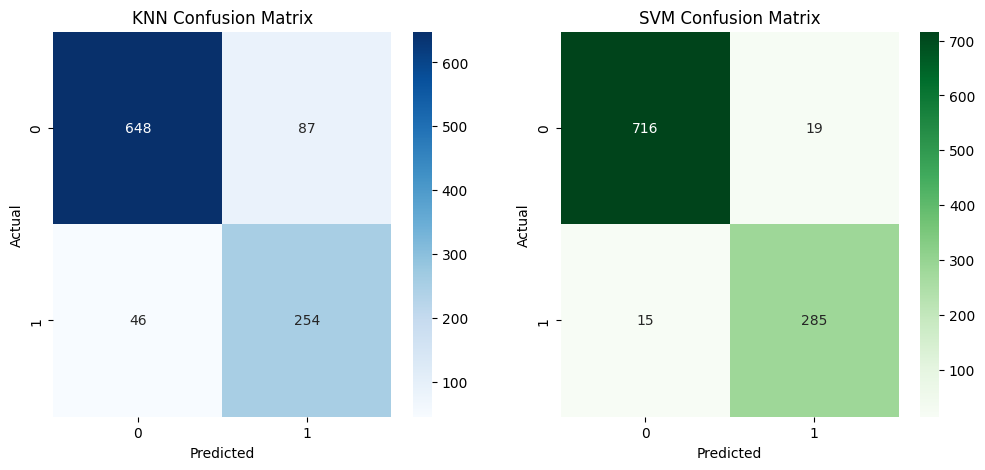

In [19]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("KNN Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("SVM Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()